This project leverages **Transfer Learning** with the ***MobileNetV2 architecture*** in ***Keras*** to create a classification model for identifying five specific rice varieties: A**rborio, Basmati, Ipsala, Jasmine, and Karacadag**. Using a comprehensive dataset with 75,000 images (15,000 for each variety), the model aims to classify rice types based on their visual features, providing insights valuable for seed selection and quality assessment.

By applying ***advanced machine learning and deep neural networks***, this system aspires not only to enhance rice production and quality evaluation but also to support the broader fields of computer vision and pattern recognition. The findings here may serve as a foundation for automated classification and quality assessment across a range of agricultural products, contributing to innovations in agriculture and food quality control.

***IMPORT LIBRARY***

---



In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
import matplotlib.patches as patches
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.image as mpimg
#Required Library

***Creating DataFrame for Image Files And Lables***

---



In [3]:
!pip install gdown
import gdown

# File ID and destination
file_id = "1b8NUByt5YLNQj0LPJMXLlH0FD5qsWJMi"
destination = "IMAGE.zip"

# Download the file
gdown.download(f"https://drive.google.com/uc?id={file_id}", destination, quiet=False)
##loading of the zip file

Downloading...
From (original): https://drive.google.com/uc?id=1b8NUByt5YLNQj0LPJMXLlH0FD5qsWJMi
From (redirected): https://drive.google.com/uc?id=1b8NUByt5YLNQj0LPJMXLlH0FD5qsWJMi&confirm=t&uuid=a4430dac-1fc4-42fa-a8d9-53a039233f53
To: /content/IMAGE.zip
100%|██████████| 231M/231M [00:03<00:00, 70.8MB/s]


'IMAGE.zip'

In [4]:
import zipfile

# Path to the downloaded zip file
zip_path = "IMAGE.zip"

# Extract contents
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/IMAGE")

print("Dataset extracted to /content/IMAGE")


Dataset extracted to /content/IMAGE


In [5]:
import zipfile

# Define the path to the zip file and the extraction directory
zip_path = "/content/IMAGE.zip"  # Path to the zip file
extract_path = "/content/IMAGE"  # Folder where the contents will be extracted

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Dataset extracted to: {extract_path}")


Dataset extracted to: /content/IMAGE


In [6]:
zip_path = "/content/IMAGE"  # Now this points to the extracted folder


In [7]:
import os
import pandas as pd

# Path to the extracted IMAGE folder
image_dir = "/content/IMAGE/IMAGE"  # Correct path to the nested IMAGE folder
data = []

# Iterate through the subdirectories (rice type folders) inside the second IMAGE folder
for class_name in os.listdir(image_dir):
    class_dir = os.path.join(image_dir, class_name)  # Full path to each rice type folder
    if os.path.isdir(class_dir):  # Ensure it's a directory (class folder)
        print(f"Processing class: {class_name}")
        # Loop through the image files in each rice type folder
        for img_file in os.listdir(class_dir):
            if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):  # Ensure it's an image file
                file_path = os.path.join(class_dir, img_file)  # Full path to each image
                data.append([file_path, class_name])  # Add the image path and label

# Create a DataFrame from the list of data
df = pd.DataFrame(data, columns=['Image', 'label'])

# Display the first few rows of the DataFrame
print(df.head())


Processing class: Arborio
Processing class: Ipsala
Processing class: Basmati
Processing class: Karacadag
Processing class: Jasmine
                                              Image    label
0  /content/IMAGE/IMAGE/Arborio/Arborio (11050).jpg  Arborio
1    /content/IMAGE/IMAGE/Arborio/Arborio (448).jpg  Arborio
2  /content/IMAGE/IMAGE/Arborio/Arborio (11895).jpg  Arborio
3   /content/IMAGE/IMAGE/Arborio/Arborio (7889).jpg  Arborio
4   /content/IMAGE/IMAGE/Arborio/Arborio (7075).jpg  Arborio


In [8]:
df.head(9)

,Image,label
0,/content/IMAGE/IMAGE/Arborio/Arborio (11050).jpg,Arborio
1,/content/IMAGE/IMAGE/Arborio/Arborio (448).jpg,Arborio
2,/content/IMAGE/IMAGE/Arborio/Arborio (11895).jpg,Arborio
3,/content/IMAGE/IMAGE/Arborio/Arborio (7889).jpg,Arborio
4,/content/IMAGE/IMAGE/Arborio/Arborio (7075).jpg,Arborio
5,/content/IMAGE/IMAGE/Arborio/Arborio (12796).jpg,Arborio
6,/content/IMAGE/IMAGE/Arborio/Arborio (8515).jpg,Arborio
7,/content/IMAGE/IMAGE/Arborio/Arborio (9336).jpg,Arborio
8,/content/IMAGE/IMAGE/Arborio/Arborio (13262).jpg,Arborio


***DATA VISUALIZATION***

---



<ipython-input-9-5c9cda8ec7f0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='label', data=df, palette=colors, edgecolor="black", linewidth=1.5)


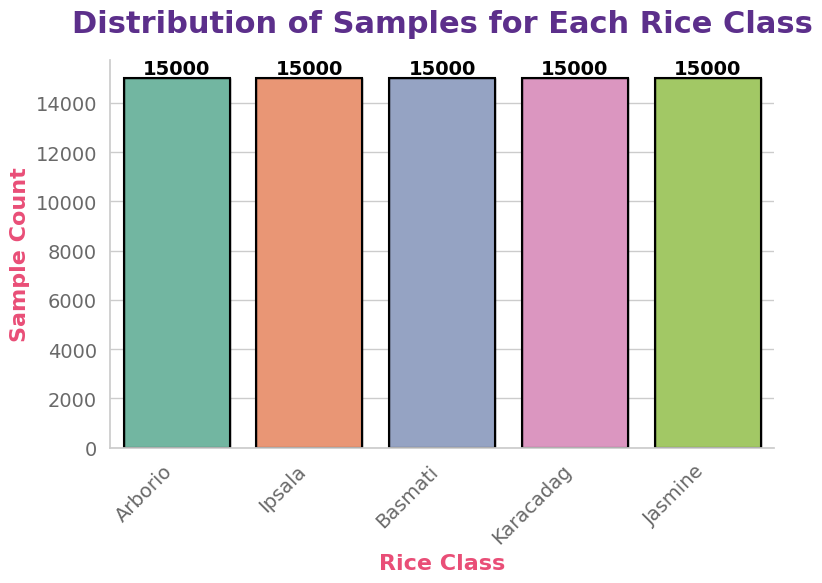

In [9]:
sns.set(style="whitegrid")
colors = sns.color_palette("Set2", len(df['label'].unique()))

# Create the plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='label', data=df, palette=colors, edgecolor="black", linewidth=1.5)

# Title and axis labels with enhanced styling
ax.set_title("Distribution of Samples for Each Rice Class", fontsize=22, weight='bold', color='#5C2F8B', pad=20)
ax.set_xlabel("Rice Class", fontsize=16, weight='bold', color='#E94E77')
ax.set_ylabel("Sample Count", fontsize=16, weight='bold', color='#E94E77')

# Adjust the tick labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=14, color='dimgray')
plt.yticks(fontsize=14, color='dimgray')

# Add annotations for each bar with improved font size and color
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=14, color='black', weight='bold')

# Add border around each bar to make it visually stand out more
for p in ax.patches:
    ax.add_patch(patches.Rectangle((p.get_x(), 0), p.get_width(), p.get_height(), color='black', linewidth=1, fill=False))

# Remove unnecessary spines for a cleaner look
sns.despine()

# Layout adjustments to ensure everything fits properly
plt.tight_layout()
plt.show()


  **Count plot** displaying ***the distribution*** of rice sample images across different **classes**.


In [10]:
class_names = df['label'].unique().tolist()
print("Class names:", class_names)

Class names: ['Arborio', 'Ipsala', 'Basmati', 'Karacadag', 'Jasmine']


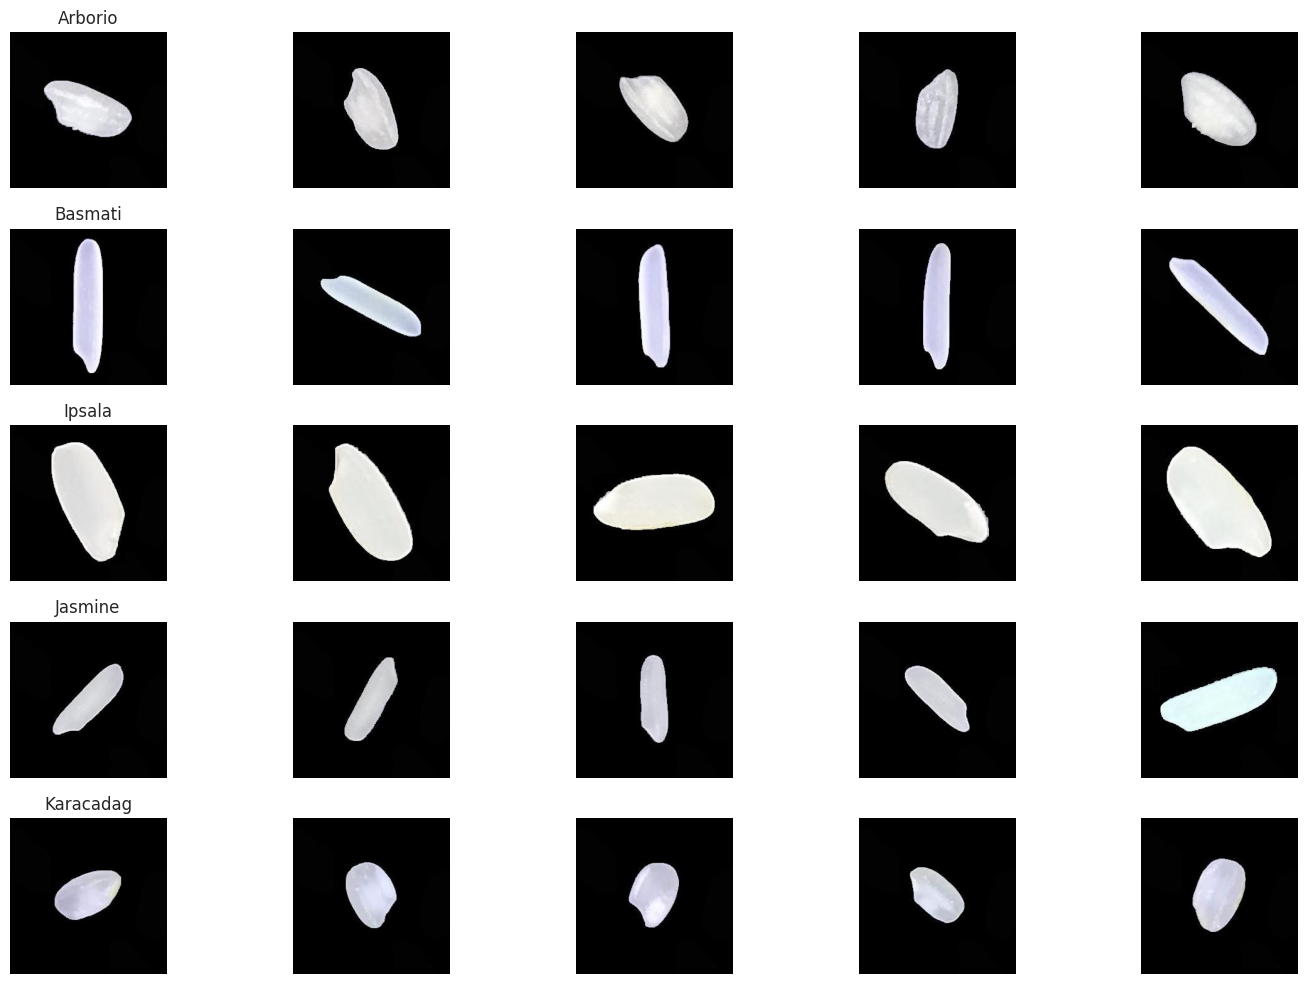

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Set up figure for displaying images
plt.figure(figsize=(15, 10))

# Group the DataFrame by label (rice class)
grouped = df.groupby('label')

# Loop through each rice class and display 5 random images
for i, (class_name, group) in enumerate(grouped):
    # Randomly select 5 images from each group
    random_samples = group.sample(n=5, random_state=42)

    # Display the images
    for j, (img_path, label) in enumerate(random_samples[['Image', 'label']].values):
        img = mpimg.imread(img_path)
        plt.subplot(len(grouped), 5, i * 5 + j + 1)  # Adjust the subplot grid
        plt.imshow(img)
        plt.axis('off')  # Hide axis
        plt.title(class_name if j == 0 else '', fontsize=12)  # Show class name only on first image of the class

plt.tight_layout()
plt.show()


***Splitting Data and Preparing Image Generators***

---



**Splitting the Data:**

We split the dataset into training and testing sets using train_test_split. This helps us evaluate the model’s performance on unseen data after training.

**Creating DataFrames for Training and Testing:**

We create two DataFrames, df_train and df_test, to store image paths and their corresponding labels for the training and testing sets.

**Encoding Labels:**

The labels (rice classes) are converted into numeric values using LabelEncoder. This is necessary because the model requires numeric labels, but the ImageDataGenerator needs labels as strings for classification.

**Setting Up Image Augmentation:**

To make the model more robust, we apply image augmentation, including:

Rotation, shifting, shearing, zooming, and flipping images.
Rescaling pixel values to [0, 1] by dividing by 255.
This increases the diversity of the dataset and helps the model generalize better.

**Creating Generators for Training and Testing:**

We use ImageDataGenerator to create generators that feed images in batches into the model. The training generator applies augmentations, while the testing generator only rescales the images. The class_mode='categorical' ensures that the model can handle multiple classes (rice types).

In [12]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Image'], df['label'], test_size=0.2, random_state=40)

# Creating DataFrames for training and testing data
df_train = pd.DataFrame({'Image': X_train, 'label': y_train})
df_test = pd.DataFrame({'Image': X_test, 'label': y_test})

# Encoding the labels
encoder = LabelEncoder()
df_train['label'] = encoder.fit_transform(df_train['label'])
df_test['label'] = encoder.transform(df_test['label'])

# Converting labels to strings
df_train['label'] = df_train['label'].astype(str)
df_test['label'] = df_test['label'].astype(str)

# Setting up ImageDataGenerator with augmentation
image_size = (150, 150)
batch_size = 32
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalizing pixel values
    rotation_range=45,  # Randomly rotating images
    width_shift_range=0.2,  # Randomly shifting images horizontally
    height_shift_range=0.2,  # Randomly shifting images vertically
    shear_range=0.2,  # Shearing transformations
    zoom_range=0.2,  # Randomly zooming into images
    horizontal_flip=True,  # Randomly flipping images horizontally
    fill_mode='nearest'  # Filling new pixels with nearest pixel values
)

# Creating a generator for the training data
train_generator = datagen.flow_from_dataframe(
    df_train,
    x_col='Image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # Multi-class classification
    shuffle=True  # Shuffling the training data
)

# Creating a generator for the testing data
test_generator = datagen.flow_from_dataframe(
    df_test,
    x_col='Image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # Multi-class classification
    shuffle=False  # No shuffling for testing data
)

Found 60000 validated image filenames belonging to 5 classes.
Found 15000 validated image filenames belonging to 5 classes.


***Creating a Convolutional Neural Network (CNN) for Rice Classification***

---



The ***Structure*** is:

***Convolution Layer (First Layer): ***

Filters: 32 filters.
Kernel Size: 3x3.
Activation Function: ReLU.
This layer extracts important features from the input images of size 150x150x3 (height, width, and RGB channels).

***Pooling Layer:***

Max Pooling: Pool size of 2x2.
This layer reduces the spatial dimensions of the output from the convolutional layer while retaining important features, making the model more efficient.

***Second Convolutional Layer:***

Filters: 64 filters.
Kernel Size: 3x3.
Activation Function: ReLU.
This layer captures more complex features, followed by another max pooling layer to further reduce dimensionality.

**Flattening:**

The output from the second pooling layer is flattened to convert the 2D matrix into a 1D vector, which is necessary for the fully connected layers.

***Fully Connected (Dense) Layer:***

Units: 128 units.
Activation Function: ReLU.
This dense layer helps in learning the complex combinations of features extracted by the convolutional and pooling layers.

***Output Layer:***

Units: 5 units (representing the 5 rice categories).
Activation Function: Softmax.
The softmax activation function is used for multi-class classification, as it converts the output into probabilities for each class.

In [13]:
cnn = tf.keras.models.Sequential()

# Step 1: Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(150, 150, 3)))

# Step 2: Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Step 3: Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 4: Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 5: Full connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 6: Output layer
cnn.add(tf.keras.layers.Dense(units=5, activation='softmax'))

# Compile the model
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      10,616,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,636,997 (40.58 MB)

 Trainable params: 10,636,997 (40.58 MB)

 Non-trainable params: 0 (0.00 B)

***Summary of your CNN model:***

Convolutional Layers: Extract features from the images using filters (32 and 64 filters). Each layer reduces the spatial dimensions of the images while increasing the depth (number of features).

Max-Pooling Layers: Reduce the size of the feature maps, keeping the important information while cutting down on computational load.

Flatten Layer: Converts the 2D data into a 1D vector for feeding into the fully connected layer.

Fully Connected Layers (Dense): The model uses two dense layers, one with 128 units and another with 5 units (for classification). The dense layers contain the majority of the model's parameters.

Output Layer: 5 units for 5 rice classes, using softmax for multi-class classification.


---



**Parameter Analysis:**

**Total params:**
 The total number of trainable parameters in the model is 10,636,997.

**Trainable params:**
  All parameters are trainable, meaning 10,636,997 parameters.

**Non-trainable params:**
 There are no non-trainable (fixed) parameters in this model.


---
**`*Conclusion:*`**

This model architecture consists of two convolutional layers with max pooling, a flatten layer, and two dense layers, including an output layer. The high number of trainable parameters indicates that the model has significant learning capacity.











---

*** Training the Convolutional Neural Network (CNN)***

---



**Early Stopping:**

To avoid overfitting, we use early stopping. It monitors the validation loss and halts training if there’s no improvement over a specified number of epochs (patience). This helps to stop training before the model starts to memorize the training data.
It also restores the model to the best weights when validation loss is at its lowest.

**Training Process:**

The model is trained on the train_generator (training data) and validated on the test_generator (testing data).
We limit the training to 20 epochs, but the model might stop earlier due to early stopping if there’s no improvement.

Training History: **bold text**

The training process is captured in the history object. This allows us to later analyze the metrics such as loss and accuracy for both training and validation, helping us evaluate the model's performance.

In [15]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)

# Training the model with the callbacks
history = cnn.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7286 - loss: 0.6531
Epoch 1: val_loss improved from inf to 0.16224, saving model to best_model.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3003s 2s/step - accuracy: 0.7286 - loss: 0.6530 - val_accuracy: 0.9415 - val_loss: 0.1622
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9388 - loss: 0.1709
Epoch 2: val_loss improved from 0.16224 to 0.15036, saving model to best_model.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3014s 2s/step - accuracy: 0.9388 - loss: 0.1709 - val_accuracy: 0.9431 - val_loss: 0.1504
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9608 - loss: 0.1109
Epoch 3: val_loss improved from 0.15036 to 0.10605, saving model to best_model.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3035s 2s/step - accuracy: 0.9608 - loss: 0.1109 - val_accuracy: 0.9615 - val_loss: 0.1061
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9667 - loss: 0.0977
Epoch 4: val_loss improved from 0.10605 to 0.0573

In [16]:
test_loss, test_accuracy = cnn.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

469/469 ━━━━━━━━━━━━━━━━━━━━ 278s 592ms/step - accuracy: 0.9913 - loss: 0.0296
Test Loss: 0.03028370440006256
Test Accuracy: 0.9908666610717773


469/469 ━━━━━━━━━━━━━━━━━━━━ 262s 559ms/step
              precision    recall  f1-score   support

     Arborio       0.99      0.99      0.99      2953
     Basmati       1.00      0.99      0.99      2973
      Ipsala       1.00      1.00      1.00      3016
     Jasmine       0.98      0.99      0.98      2997
   Karacadag       1.00      0.99      1.00      3061

    accuracy                           0.99     15000
   macro avg       0.99      0.99      0.99     15000
weighted avg       0.99      0.99      0.99     15000



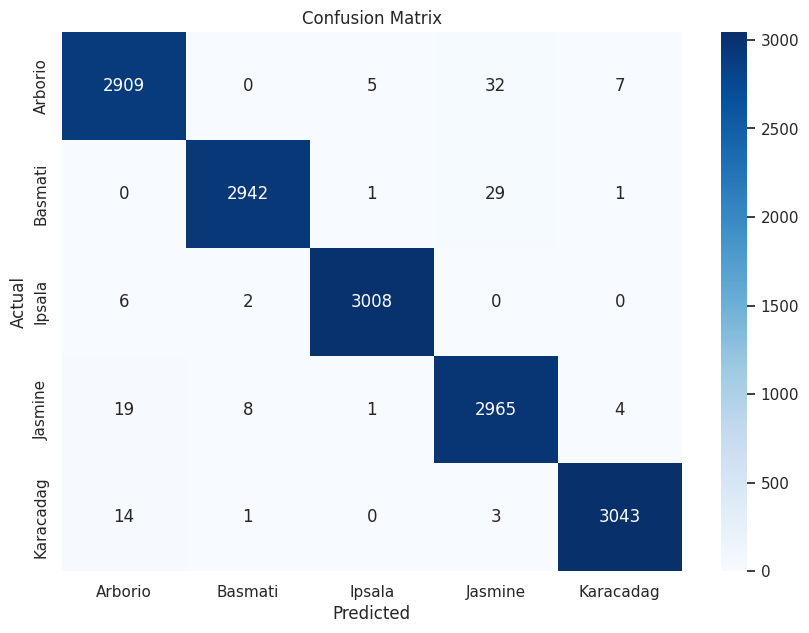

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on the test set
y_pred = cnn.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=encoder.classes_))

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

***Analysis***

***Confusion Matrix***

Each column represents the predicted class, and each row represents the actual class. The values indicate the number of samples.

Most predictions are correct, as the majority of values lie on the main diagonal.
There are very few errors; for instance, the model confused Arborio with Jasmine and Karacadag, but these instances are very limited.

***Evaluation Metrics:***

***Precision, Recall, and F1-Score for each class are very high (close to 1.00), demonstrating strong performance in identifying each class.***
Overall Accuracy is 99%, indicating that the model has performed exceptionally well.
Conclusion:
The model is highly accurate in identifying and classifying different types of rice, with minimal errors.

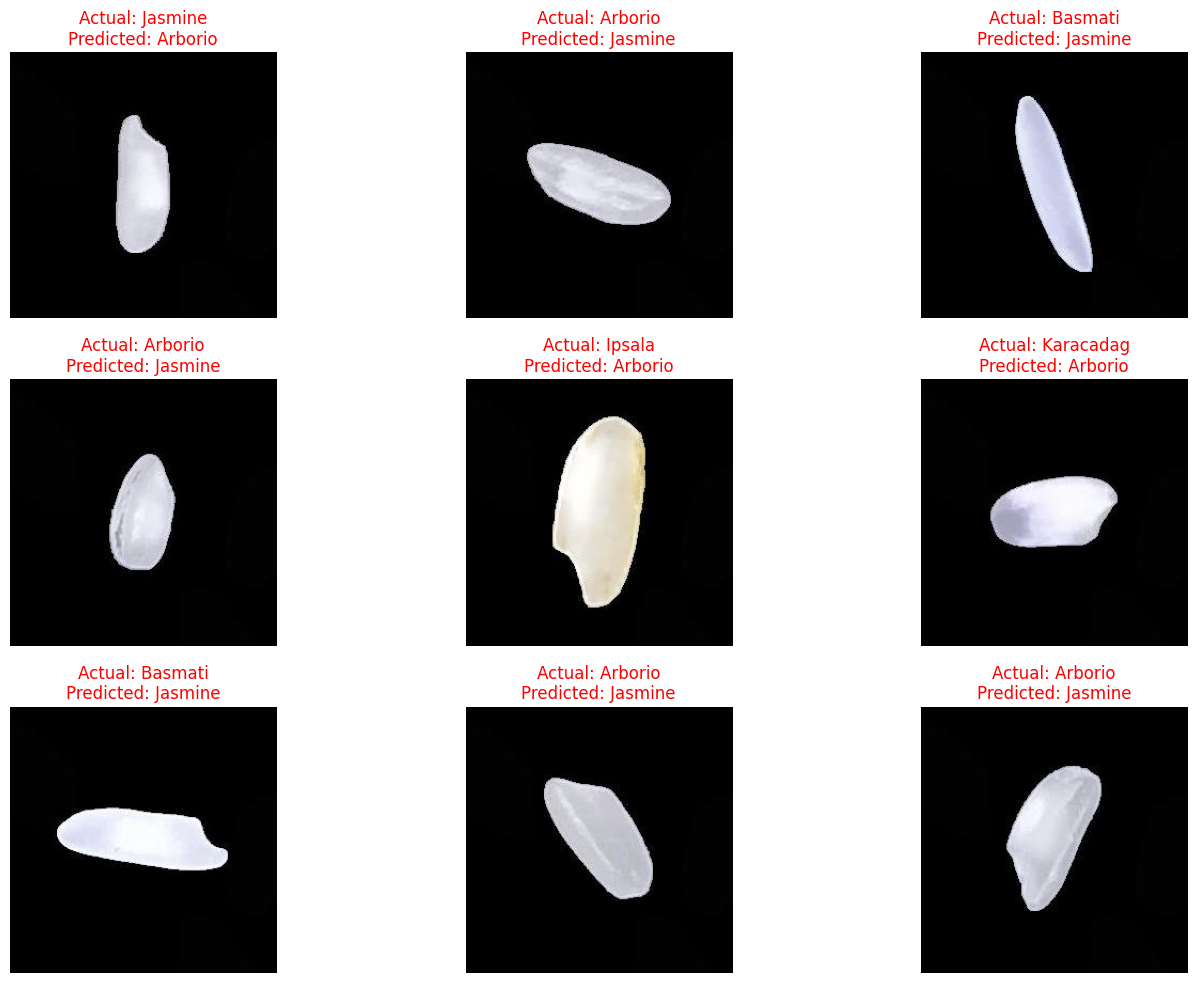

In [19]:
# Displaying Misclassified Images
errors = np.where(y_pred_classes != y_true)[0]

plt.figure(figsize=(15, 10))
for i, error in enumerate(errors[:9]):  # Displaying the first 9 mistakes
    plt.subplot(3, 3, i + 1)
    img_path = test_generator.filepaths[error]
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.title(f"Actual: {encoder.classes_[y_true[error]]}\nPredicted: {encoder.classes_[y_pred_classes[error]]}",
              color='red' if y_true[error] != y_pred_classes[error] else 'green')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [20]:
# Printing the total number of misclassifications
total_errors = len(errors)
print(f"Total number of misclassified images: {total_errors}")

Total number of misclassified images: 133


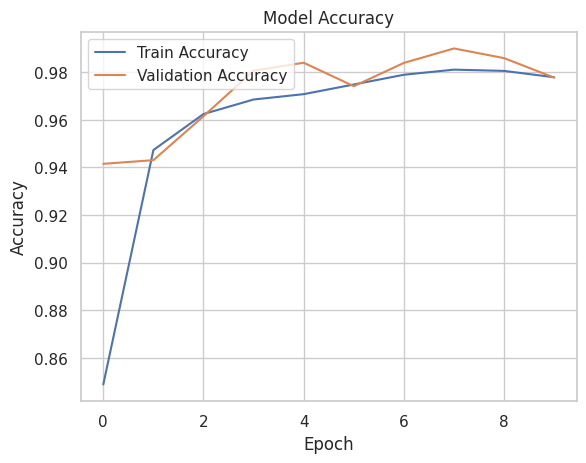

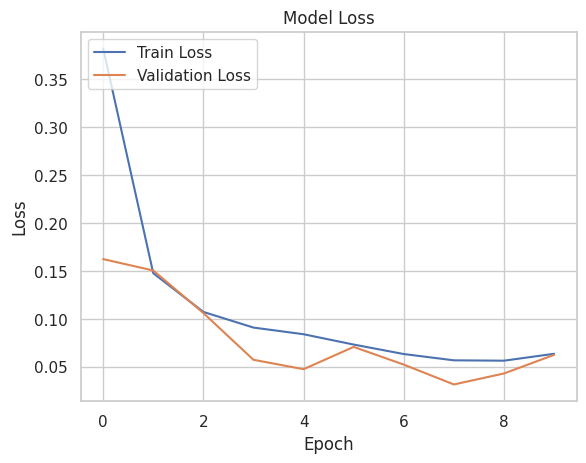

In [21]:
# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

***Model Accuracy***

The train accuracy (blue line) starts around 88% and quickly improves, reaching around 98% by the 5th epoch.
Validation accuracy (orange line) also rises steadily, aligning closely with the training accuracy by the last epoch.
The convergence between train and validation accuracy suggests that the model generalizes well without overfitting.


---



***Model Loss***

The train loss (blue line) drops sharply in the first few epochs, stabilizing below 0.05 after the 5th epoch.
Validation loss (orange line) follows a similar pattern, maintaining a low value with slight fluctuations toward the end.
The low and stable loss values for both train and validation sets indicate the model has learned effectively and isn’t struggling with significant errors.


---



***Summary***

The plots indicate a well-trained model with high accuracy and low loss on both the training and validation sets, showing minimal overfitting and strong generalization.